# a) Histogram Equalization for full image

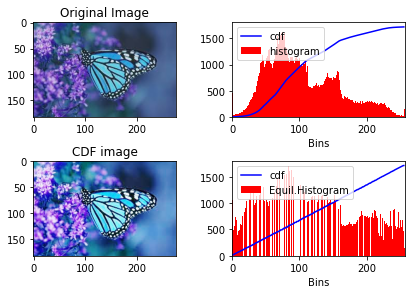

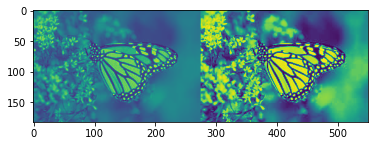

In [30]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("C:/Users/GFLAB/Dropbox/PC/Documents/Image and speech processing/img_sp_lab/dataset/imgs/butterfly.jpg")
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()
plt.subplot(2,2,2)
plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.xlabel('Bins')
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
plt.subplot(2,2,3)
plt.title('CDF image')
plt.imshow(img2)
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()
plt.subplot(2,2,4)
plt.plot(cdf_normalized,color='b')
plt.hist(img2.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','Equil.Histogram'),loc ='upper left')
plt.tight_layout()
plt.xlabel('Bins')
plt.show()
img = cv.imread("C:/Users/GFLAB/Dropbox/PC/Documents/Image and speech processing/img_sp_lab/dataset/imgs/butterfly.jpg",0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ))
cv.imwrite('res.png',res)
img = cv.imread('res.png',0)
plt.imshow(img)
plt.show()



# b) Histogram equalization for part of an image

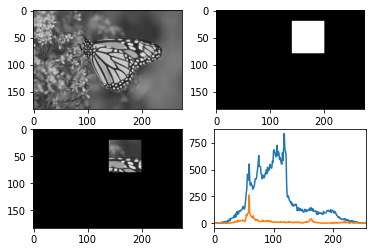

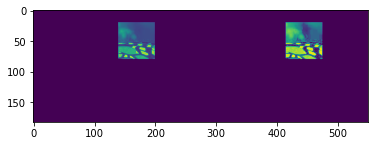

In [38]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("C:/Users/GFLAB/Dropbox/PC/Documents/Image and speech processing/img_sp_lab/dataset/imgs/butterfly.jpg",0)
mask = np.zeros(img.shape[:2],np.uint8)
mask[20:80,140:200] = 255
masked_img = cv.bitwise_and(img,img,mask=mask)
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.imshow(mask,'gray')
plt.subplot(223),plt.imshow(masked_img,'gray')
plt.subplot(224),plt.plot(hist_full),plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()
equ = cv.equalizeHist(masked_img)
res = np.hstack((masked_img,equ))
cv.imwrite('result.png',res)
img = cv.imread('result.png',0)
plt.imshow(img)
plt.show()